In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from CART import CART

In [13]:
# load the data
breast_cancer = load_breast_cancer()
data, target = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=3)

# Build MyTree:
my_tree = CART(criterion='entropy')
my_tree.fit(X_train, y_train)

# Predict:
train_pred = my_tree.predict(X_train)

# Eval:
print("MyTree Train Confusion matrix:")
print(confusion_matrix(y_train, train_pred))
print(f"MyTree Train Accuracy: {accuracy_score(y_train, train_pred)}")
print('-'*10)

test_pred = my_tree.predict(X_test)
print("MyTree Test Confusion matrix:")
print(confusion_matrix(y_test, test_pred))
print(f"MyTree Test Accuracy: {accuracy_score(y_test, test_pred)}")

# Draw:
print("MyTree, explained:")
my_tree.print_tree()


MyTree Train Confusion matrix:
[[158  14]
 [ 10 273]]
MyTree Train Accuracy: 0.9472527472527472
----------
MyTree Test Confusion matrix:
[[36  4]
 [ 4 70]]
MyTree Test Accuracy: 0.9298245614035088
MyTree, explained:
 if X[22] <= 117.45
    then if X[27] <= 0.14235
        then if X[13] <= 35.435
            then {value: 1, samples: 264}
            else {value: 1, samples: 23}
        else {value: 0, samples: 34}
    else {value: 0, samples: 134}


Sklearn Train Confusion matrix:
[[172   0]
 [  0 283]]
Sklearn Train Accuracy: 1.0
----------
Sklearn Test Confusion matrix:
[[35  5]
 [ 7 67]]
Sklearn Test Accuracy: 0.8947368421052632


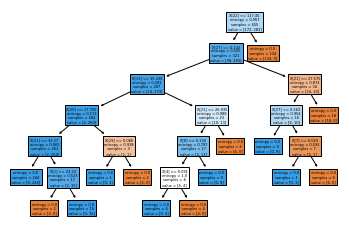

NameError: name 'export_graphviz' is not defined

In [12]:
# Fit Sklearn tree
dtree = DecisionTreeClassifier(criterion='entropy', random_state=2)
dtree.fit(X_train, y_train)
train_pred = dtree.predict(X_train)
test_pred = dtree.predict(X_test)
# Eval Sklearn tree:
print("Sklearn Train Confusion matrix:")
print(confusion_matrix(y_train, train_pred))
print(f"Sklearn Train Accuracy: {accuracy_score(y_train, train_pred)}")
print('-'*10)
print("Sklearn Test Confusion matrix:")
print(confusion_matrix(y_test, test_pred))
print(f"Sklearn Test Accuracy: {accuracy_score(y_test, test_pred)}")
# Draw tree:
print("Sklearn, explained:")
plot_tree(dtree, filled=True)
plt.show()
export_graphviz(dtree, out_file='mytree.dot',
                filled=True, rounded=True,
                special_characters=True)